IMPORTING ALL LIBRARIES

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

SPLITTING DATA IN TRAINING AND TESTING

In [3]:
(X_train , Y_train ),(X_test , Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


REDUCE THE DIMENTIONS OF THE IMAGES

In [4]:
X_train =X_train/255
X_test =X_test/255

CREATING NURAL NETWORK

In [5]:
model =Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


SUMMARISE MODEL

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

MODEL COMPILATION

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


FITTING DATA IN THE MODEL

In [8]:
history = model.fit(X_train , Y_train ,batch_size=200, epochs=30 , validation_split=0.2)

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7443 - loss: 0.8556 - val_accuracy: 0.9398 - val_loss: 0.2150
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9452 - loss: 0.1972 - val_accuracy: 0.9545 - val_loss: 0.1546
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9612 - loss: 0.1338 - val_accuracy: 0.9585 - val_loss: 0.1373
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9684 - loss: 0.1073 - val_accuracy: 0.9623 - val_loss: 0.1191
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9748 - loss: 0.0827 - val_accuracy: 0.9672 - val_loss: 0.1066
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9796 - loss: 0.0687 - val_accuracy: 0.9672 - val_loss: 0.1031
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9828 - loss: 0.0586 - val_accuracy: 0.9688 - val_loss: 0.1015
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9865 - loss: 0.0474 - val_accuracy: 

TESTING AND GET MOST ACCURATE ANSWER FROM ARGMAX

In [9]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


CHECING ACCURACY OF THE MODEL

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test , Y_pred)

0.9801

PREDICTION WITH MODEL ANSWER AND THEN SHOWING REAL ANSWER

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([1])

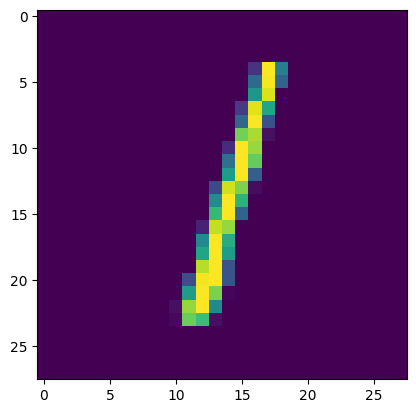

In [11]:
plt.imshow(X_test[2])
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)